<a href="https://colab.research.google.com/github/Pratham0181/python-assignments/blob/main/Bike_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

<ipython-input-2-f43e32b42257>:4: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  from numpy import math


In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
bike_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bike.csv', encoding='latin-1')

**DATA INSPECTION**

In [ ]:
# First look
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

# **DataSet Information:**

Date                             object        (Categorical)

Rented Bike Count                int64         (Numeric)

Hour                             int64         (Numeric)

Temperature(°C)                  float64       (Numeric)

Humidity(%)                      int64         (Numeric)

Wind speed (m/s)                 float64       (Numeric)

Visibility (10m)                 int64         (Numeric)

Dew point temperature(°C)        float64       (Categorical)

Solar Radiation (MJ/m2)          float64       (Categorical)

Rainfall(mm)                     float64       (Numeric)

Snowfall (cm)                    float64       (Numeric)

Seasons                          object        (Categorical)

Holiday                          object        (Categorical)

Functioning Day                  object        (Categorical)





In [ ]:
bike_df.describe(include='all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


In [ ]:
bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

## **DATA WRANGLING**

In [ ]:
# Assuming 'bike_df' is the DataFrame you want to work with
bike_df['Date'] = pd.to_datetime(bike_df['Date'], format='%d/%m/%Y') # Specify the correct date format

bike_df['month'] = bike_df['Date'].dt.month

bike_df['day'] = bike_df['Date'].dt.day_name()

# **Exploratory Data Analysis**

In [ ]:
# Dropping Date variable from dataset
bike_df.drop(['Date'],axis = 1, inplace = True)

In [ ]:
# Defining separate data as numerical and categorical data.
# Numerical data

numerical_data = list(set(bike_df.describe().columns.tolist()) - {'Hour','month'})

# Categorical data

categorical_data = list(set(bike_df.columns)-set(numerical_data))

#dependent variable Data
dependent_variable = ['Rented Bike Count']

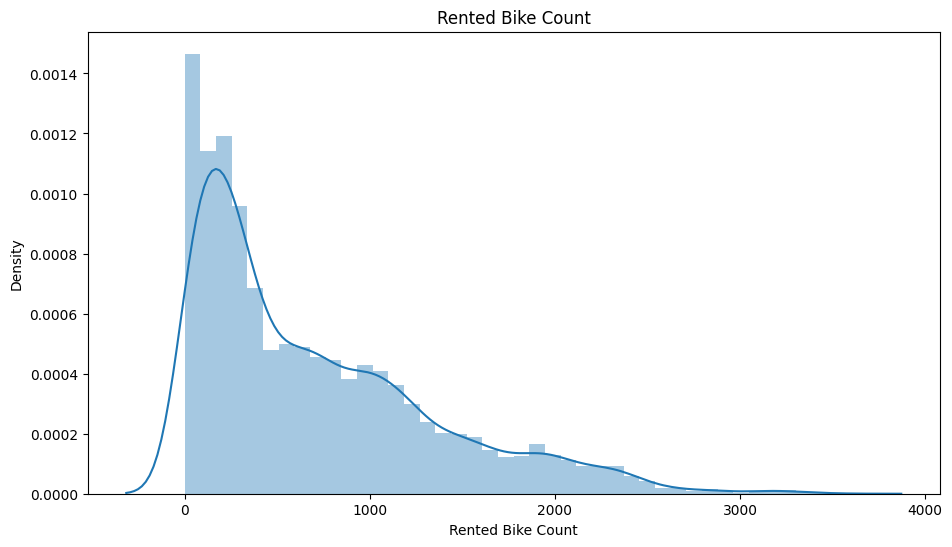

In [ ]:
# Chart - 1 visualization code
# Chart - 1 visualization code

plt.figure(figsize=(11,6))
plt.title('Rented Bike Count')
sns.distplot(bike_df['Rented Bike Count'] )
plt.show()

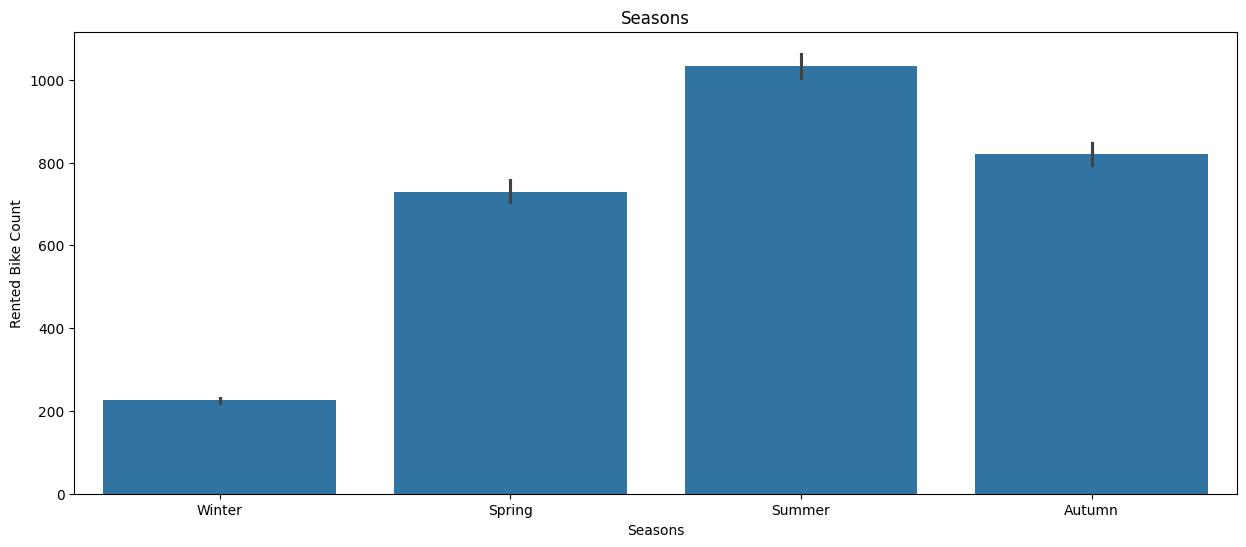

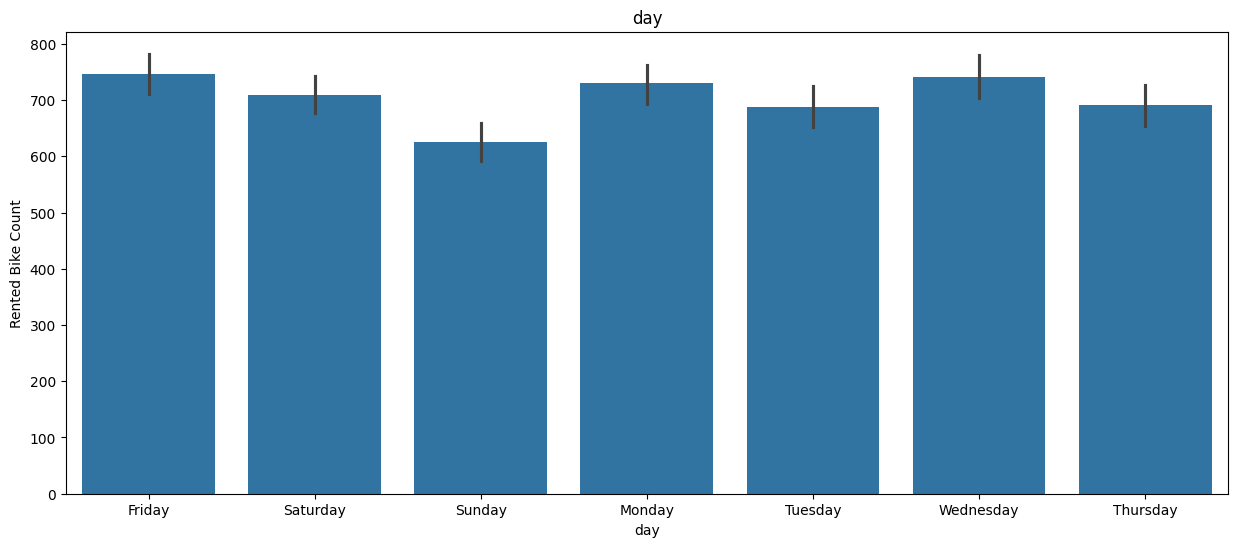

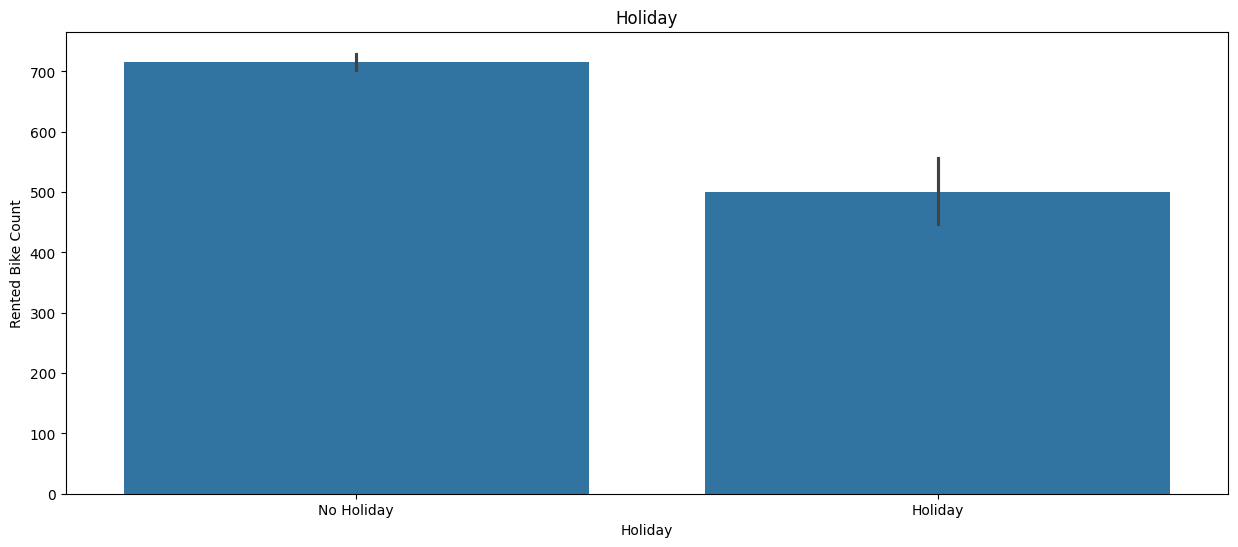

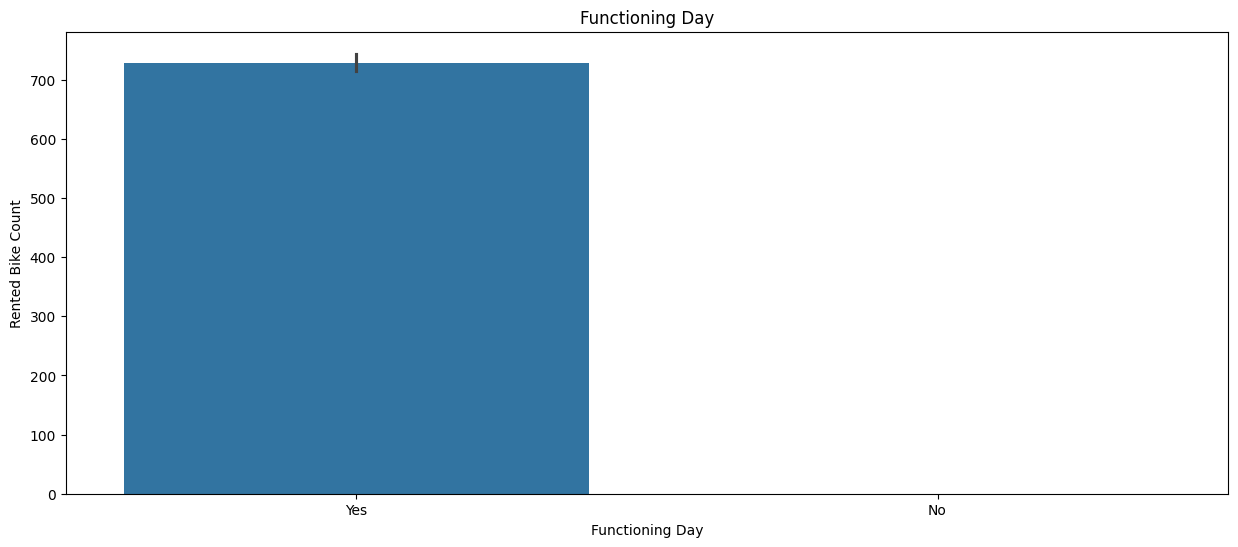

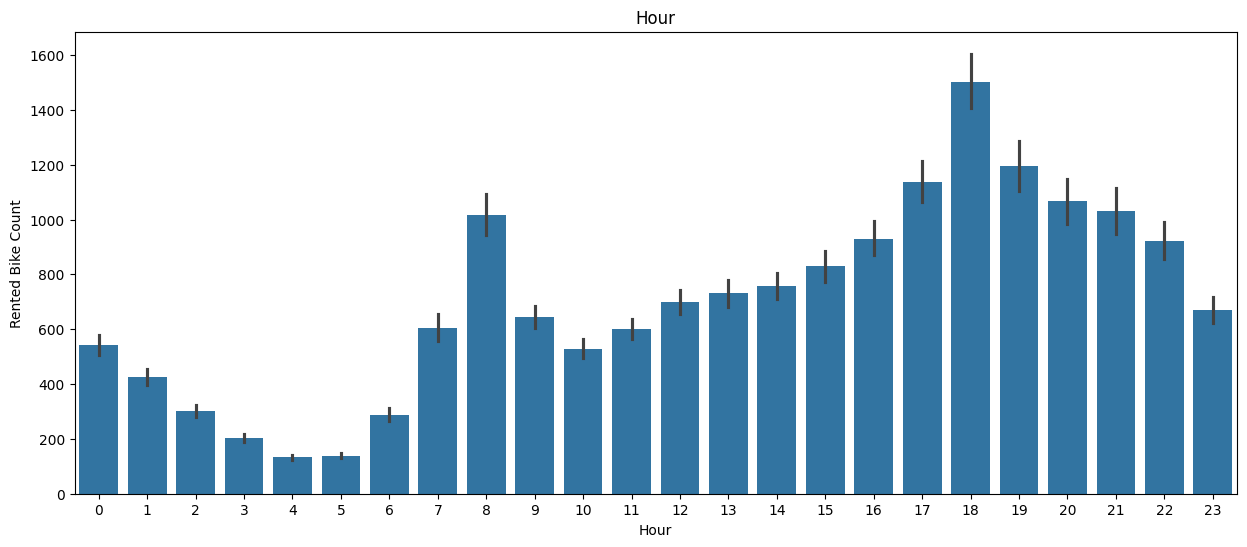

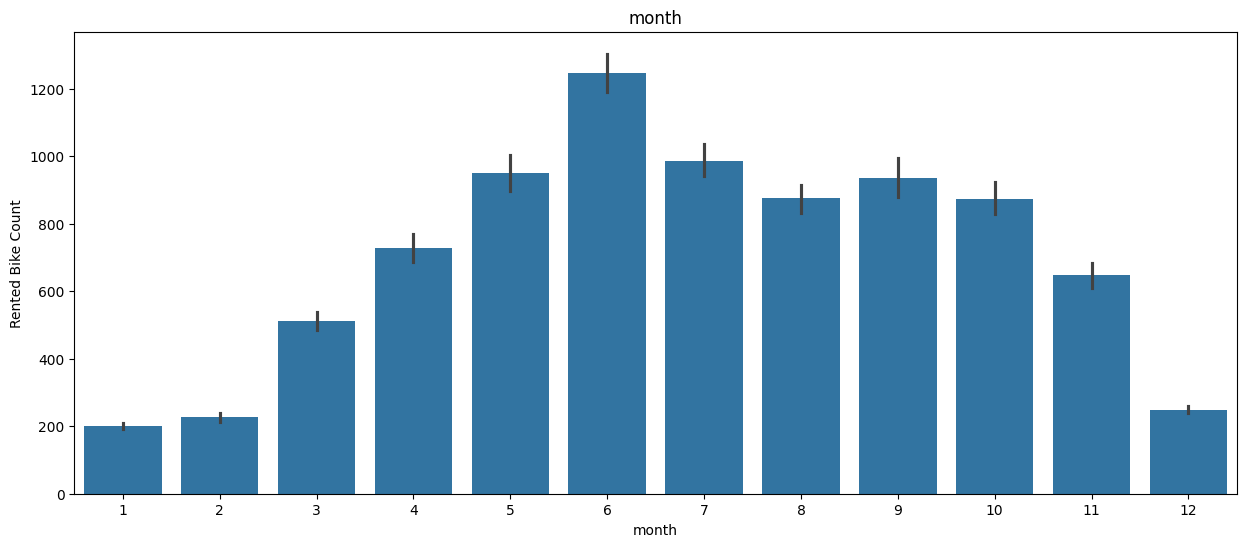

In [ ]:
# Chart - 2 visualization code

# Creating a for loop for visualizing all the categorical data with respect to Rented Bike Count.

for i in categorical_data:
    plt.figure(figsize=(15,6))
    plt.title(i)
    sns.barplot(x = bike_df[i], y = bike_df['Rented Bike Count'])
    plt.show()

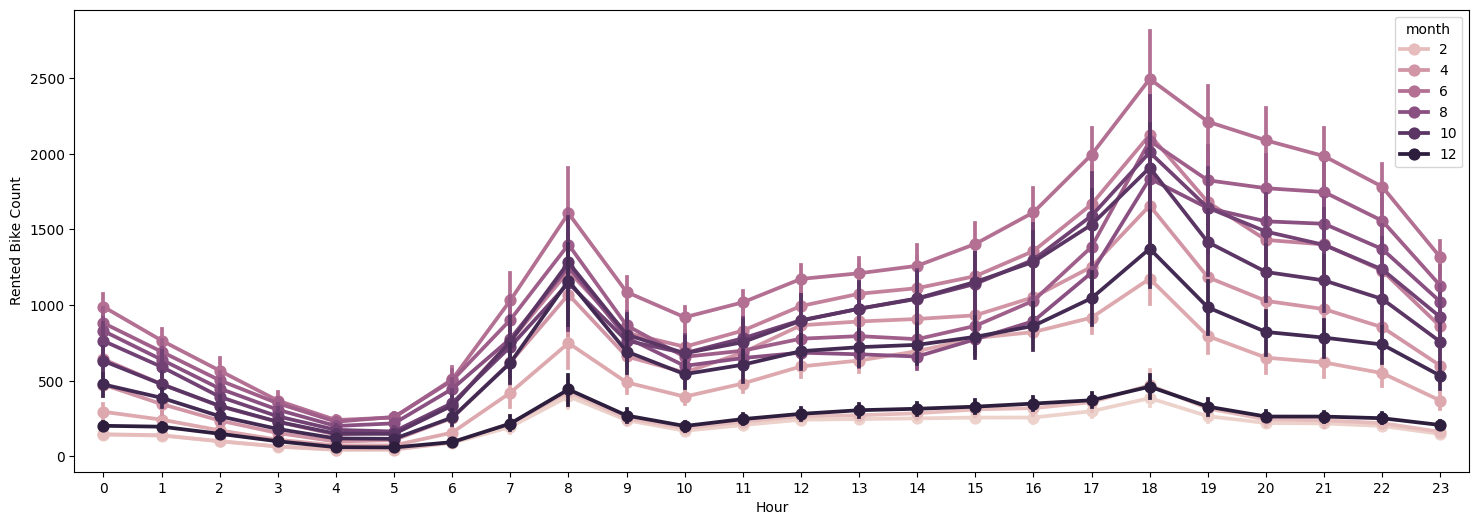

In [ ]:
# Chart - 3 visualization code

# Using pointplot for multivariate analysis.

plt.figure(figsize = (18,6))
sns.pointplot(x = bike_df['Hour'], y = bike_df['Rented Bike Count'], hue = bike_df['month'])
plt.show()

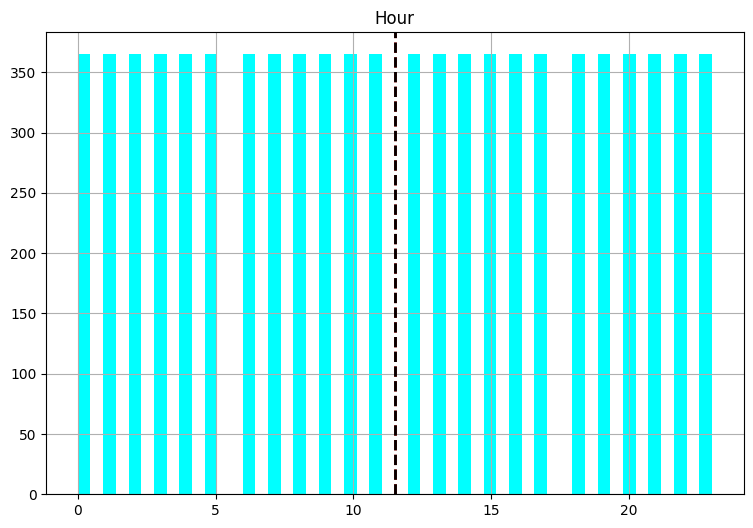

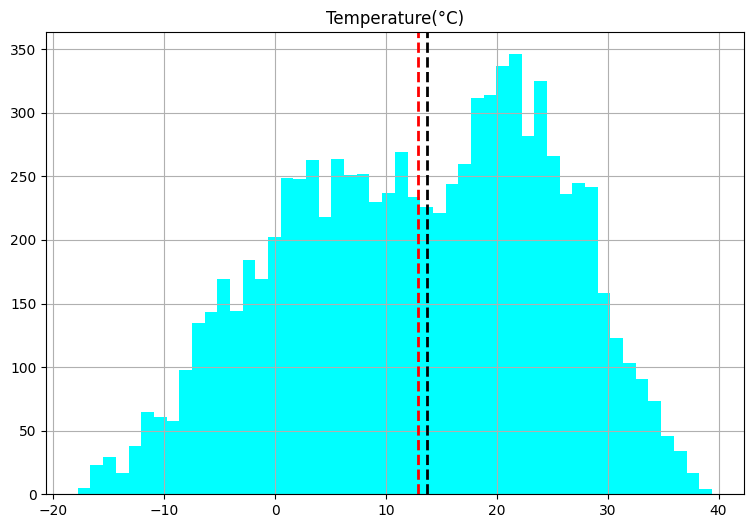

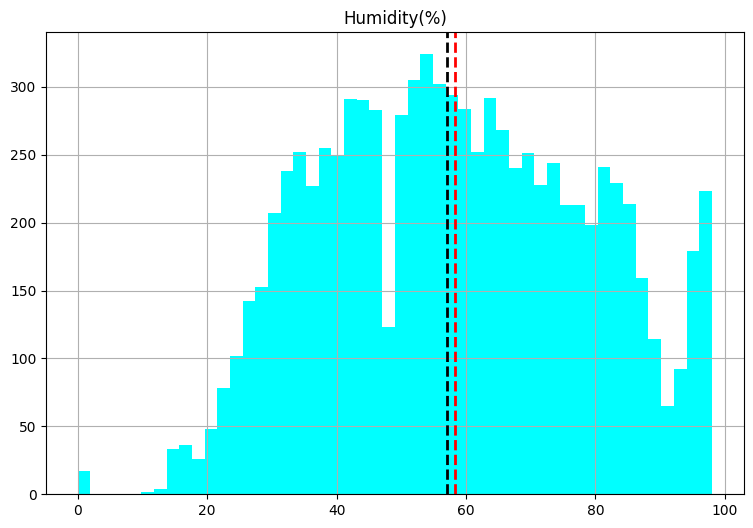

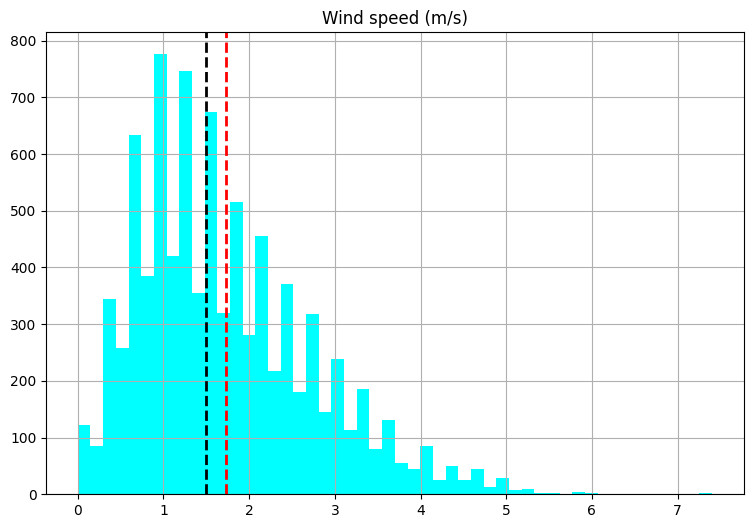

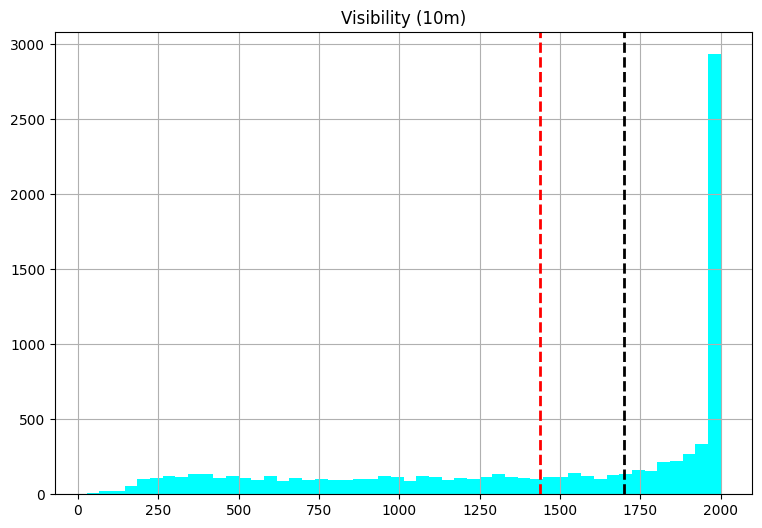

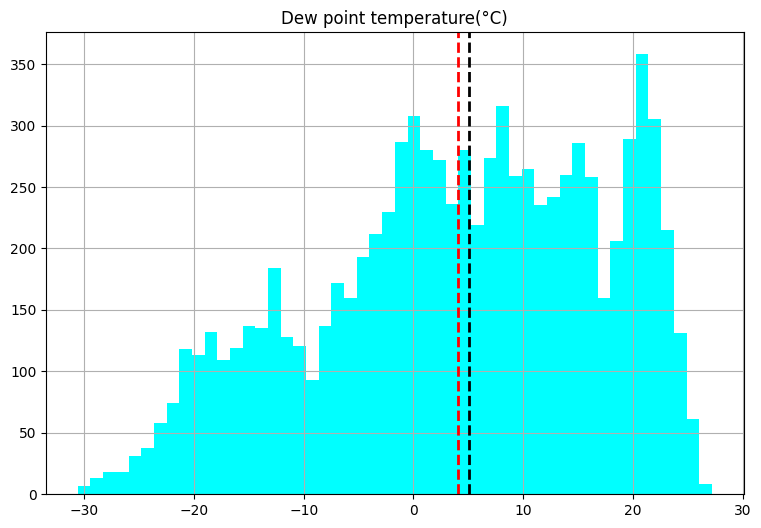

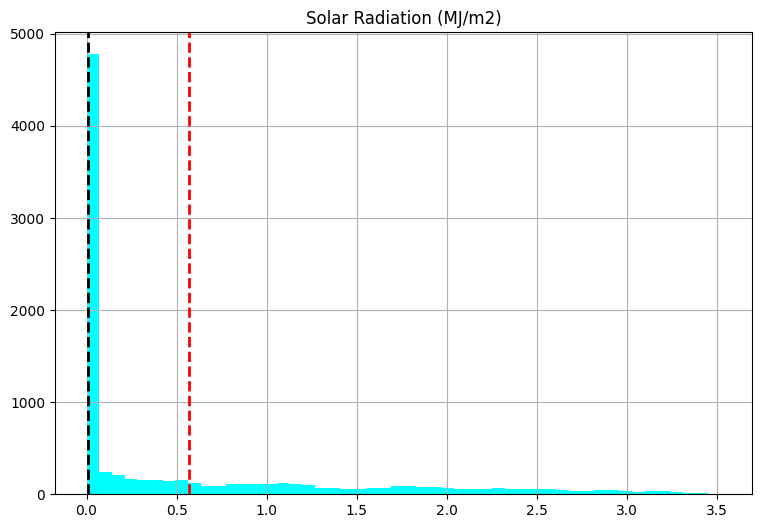

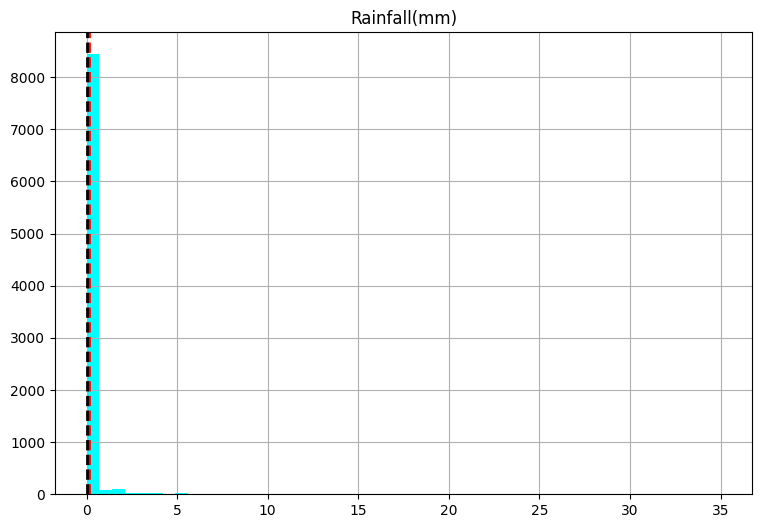

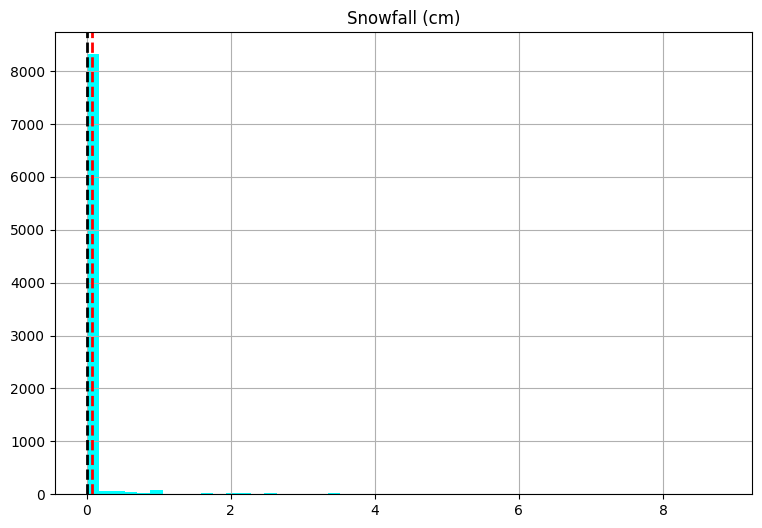

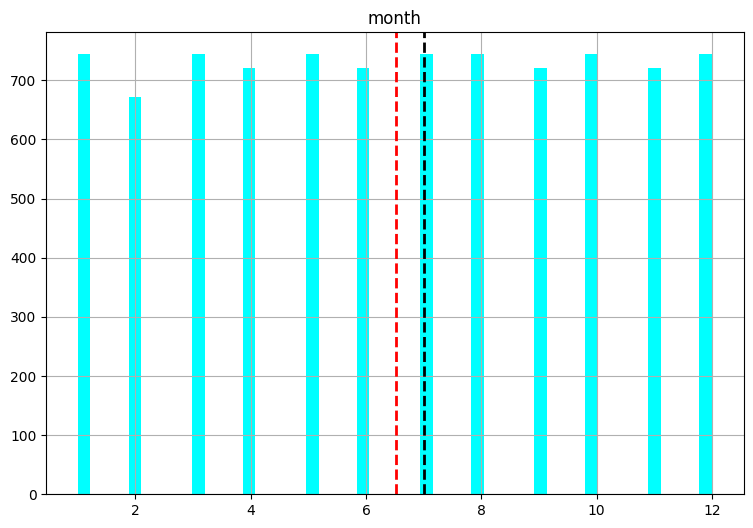

In [ ]:
#@title Default title text
# plot a bar plot for each categorical feature count (except Date)

for col in numeric_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = bike_df[col]
    feature.hist(bins=50, ax = ax, color= 'aqua' )
    ax.axvline(feature.mean(), color='red', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='black', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

In [ ]:
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']))

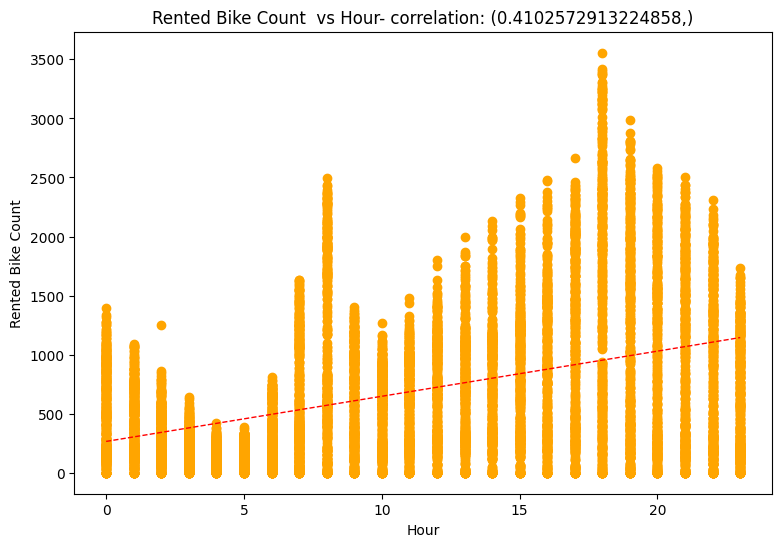

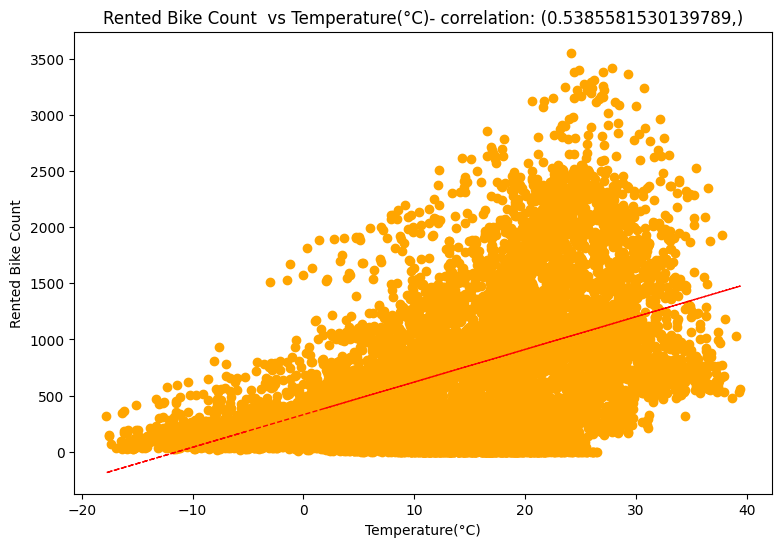

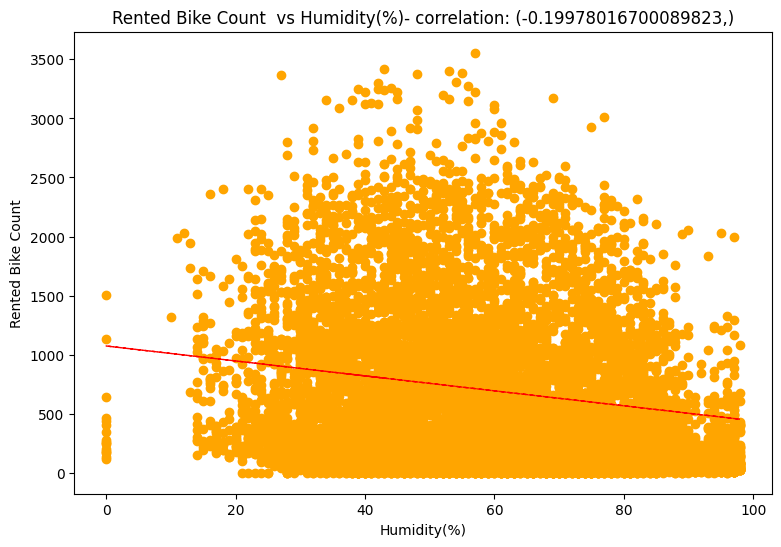

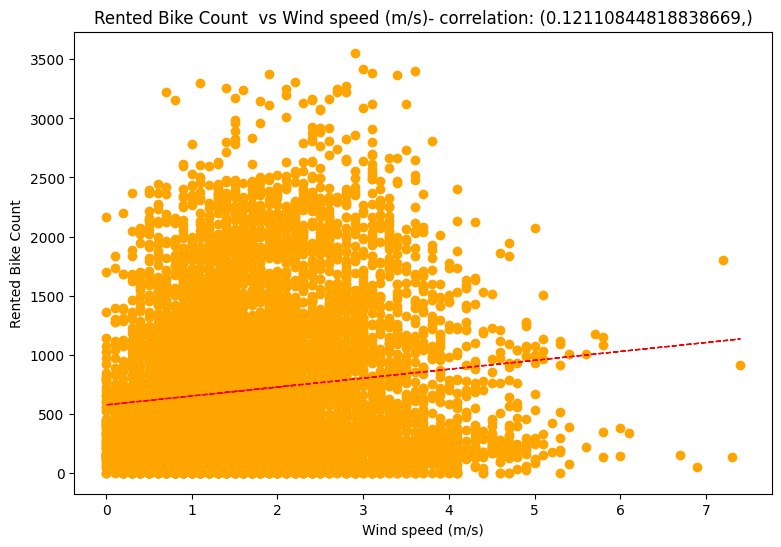

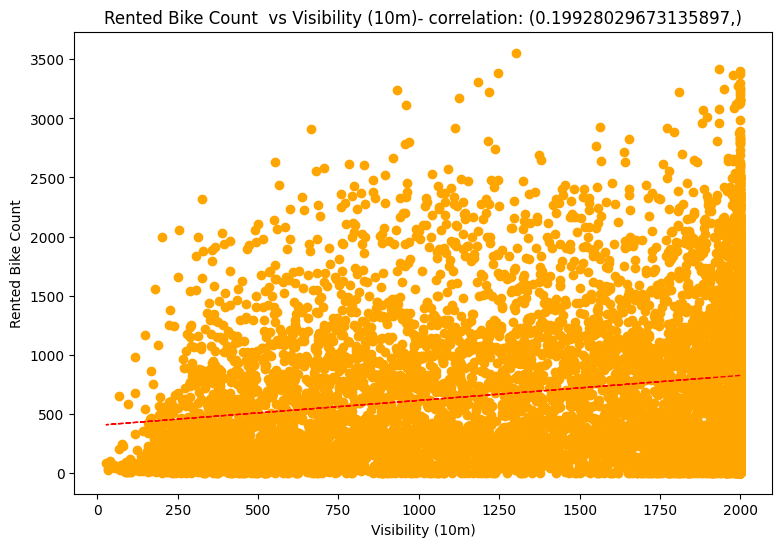

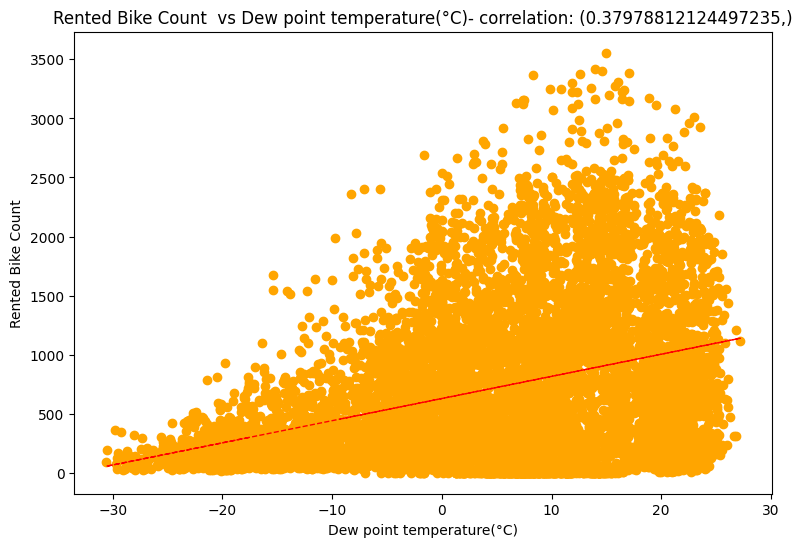

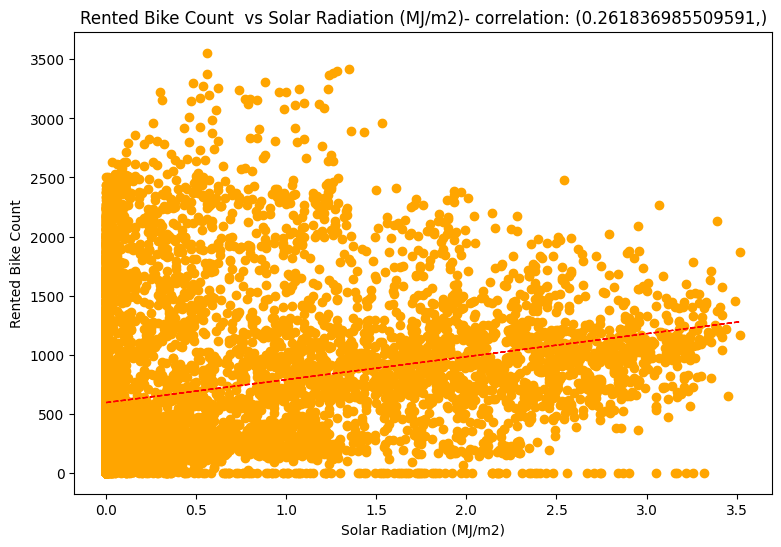

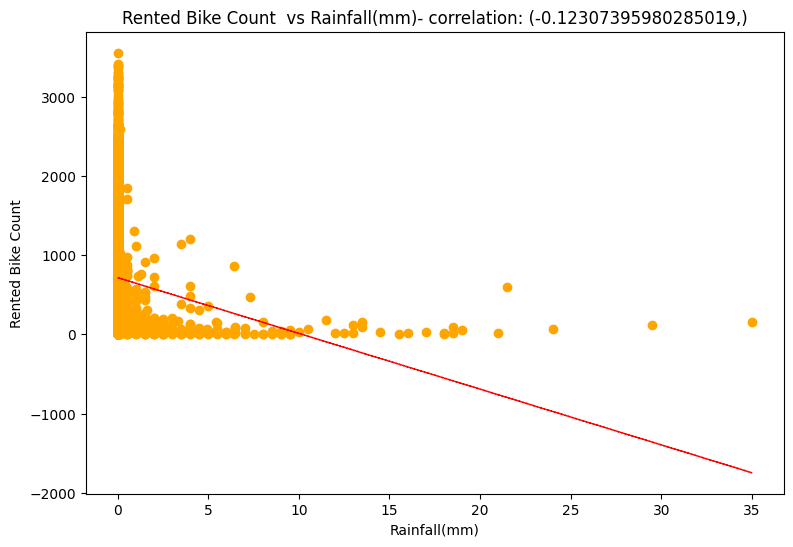

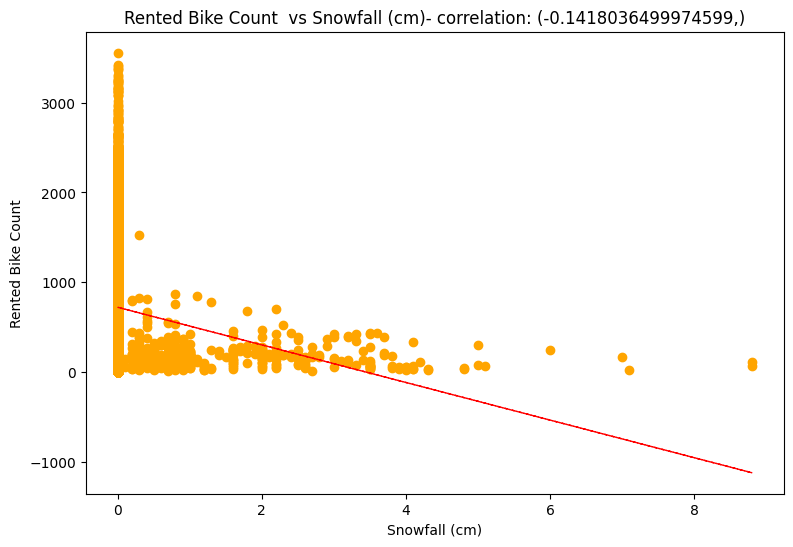

In [ ]:
for col in numeric_features[1:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = bike_df[col]
    label = bike_df['Rented Bike Count']
    correlation = feature.corr(label),
    plt.scatter(x=feature, y=label, color='orange')
    plt.xlabel(col)
    plt.ylabel('Rented Bike Count')
    ax.set_title('Rented Bike Count  vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(bike_df[col], bike_df['Rented Bike Count'], 1)
    y_hat = np.poly1d(z)(bike_df[col])

    plt.plot(bike_df[col], y_hat, "r--", lw=1, color='red')

plt.show()

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(bike_df[[col for col in bike_df.describe().columns if col not in ['Temperature(°C)','Dew point temperature(°C)','Humidity(%)','Wind speed (m/s)','Hour',]]])

,variables,VIF
0,Rented Bike Count,2.480080
1,Visibility (10m),3.912272
2,Solar Radiation (MJ/m2),1.547173
3,Rainfall(mm),1.026951
4,Snowfall (cm),1.048677
5,month,3.508813


In [ ]:
numerical_features = ['Rented Bike Count','Visibility (10m)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']

In [ ]:
categorical_features = bike_df.describe(include=['object','category']).columns

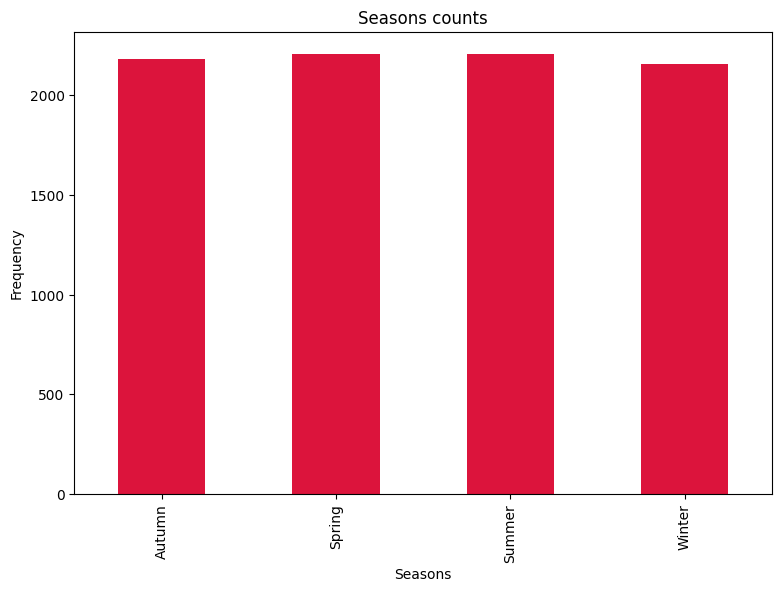

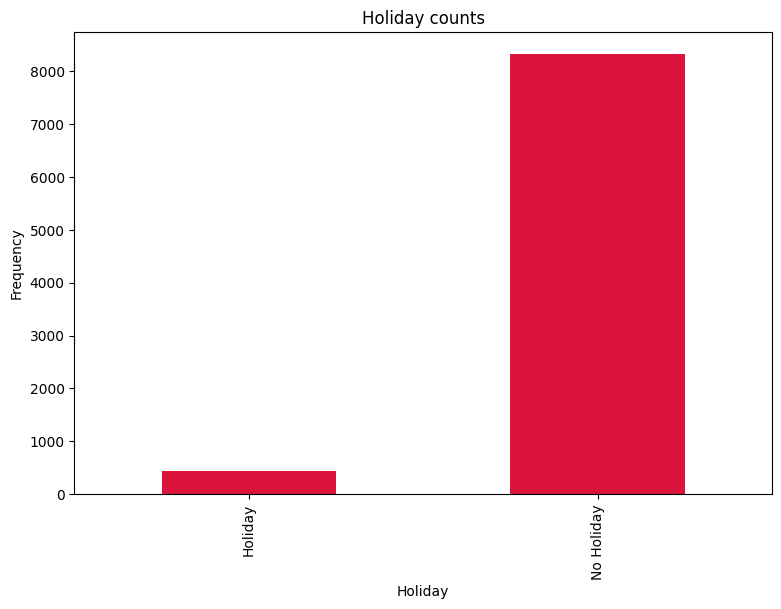

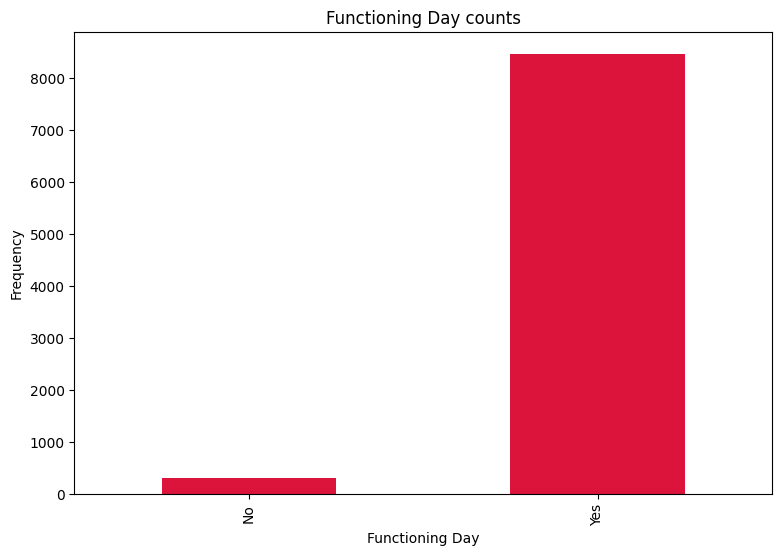

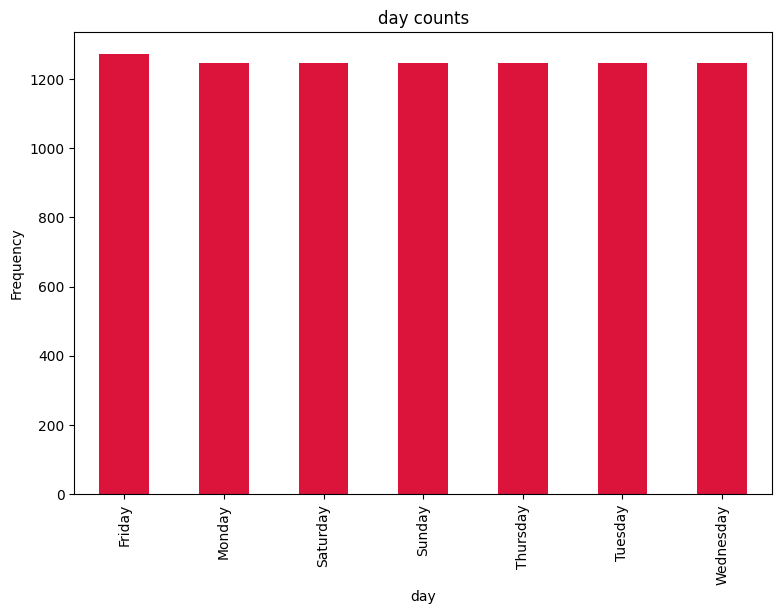

In [ ]:
# plot a bar plot for each categorical feature count

for col in categorical_features:
    counts = bike_df[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='crimson')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
plt.show()

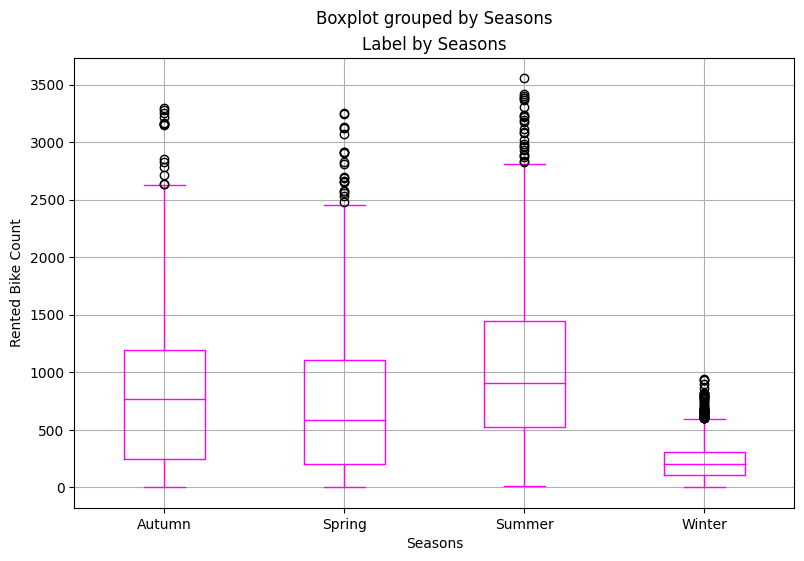

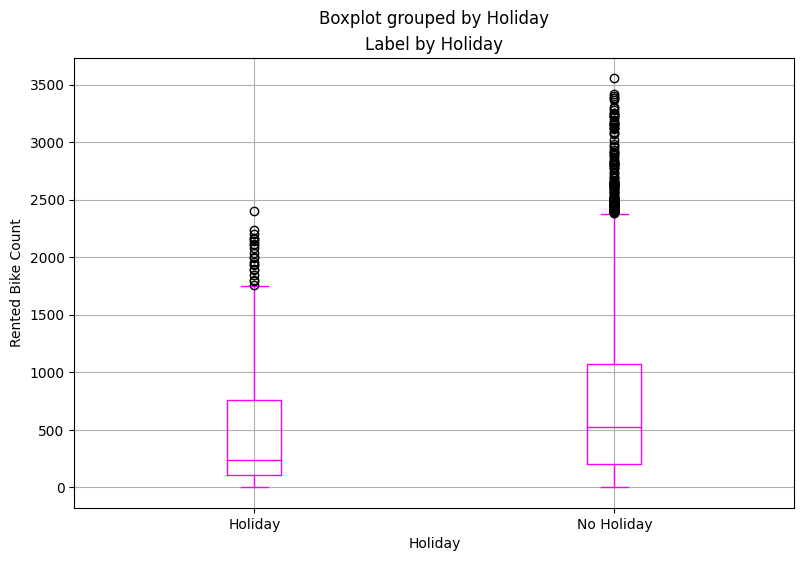

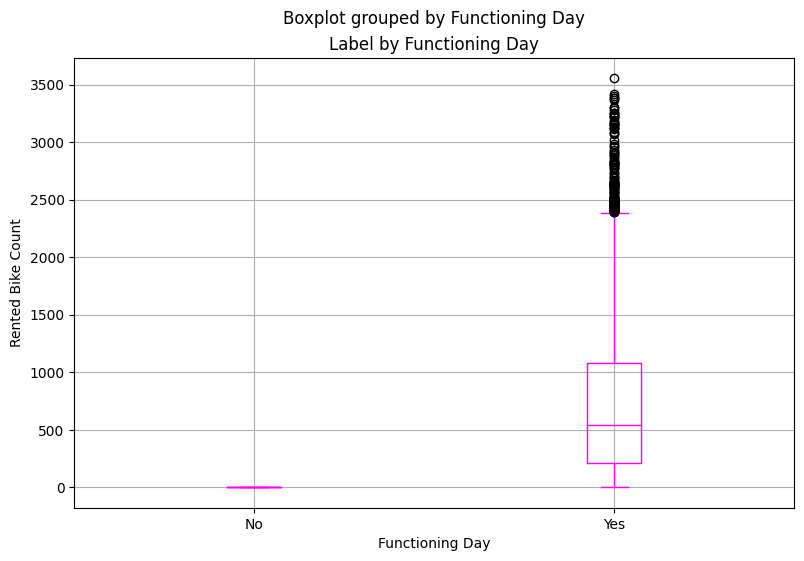

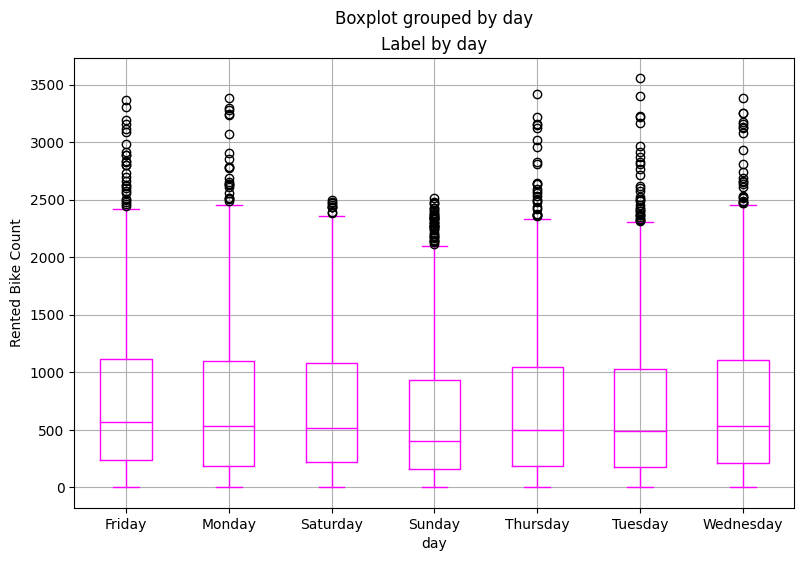

In [ ]:
# plot a boxplot for the label by each categorical feature

for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    bike_df.boxplot(column = 'Rented Bike Count', by = col, ax = ax, color='magenta')
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Rented Bike Count")
plt.show()

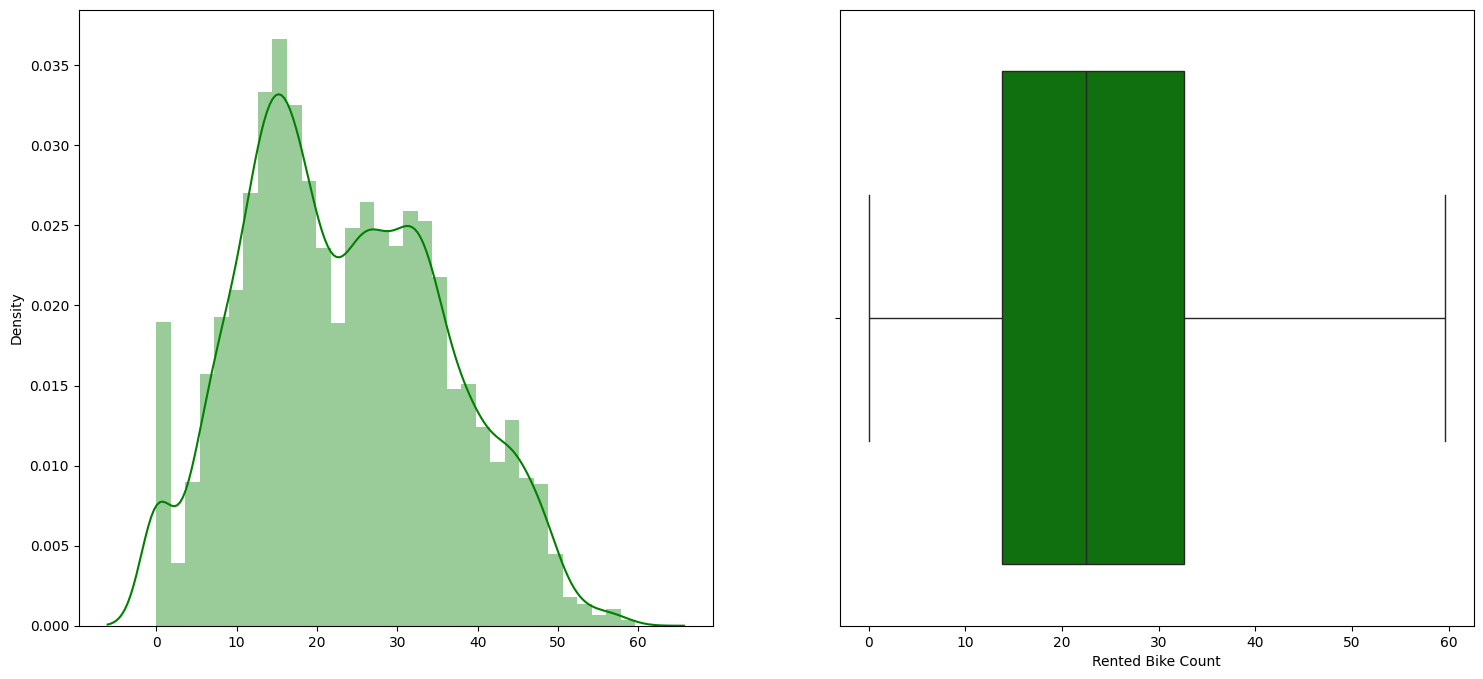

In [ ]:
# Normalizing  our target variable by squre root method

f, axes = plt.subplots(1, 2,figsize=(18,8))
sns.distplot(x=np.sqrt(bike_df['Rented Bike Count']),color='g',ax=axes[0])
sns.boxplot(x=np.sqrt(bike_df['Rented Bike Count']),color='g',ax=axes[1])
plt.show()

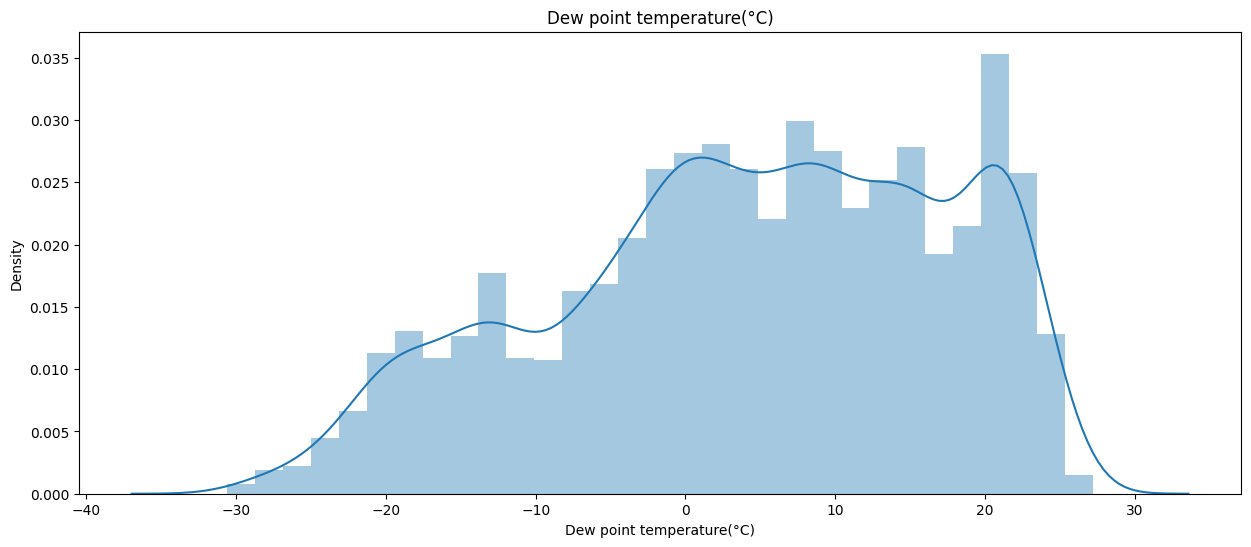

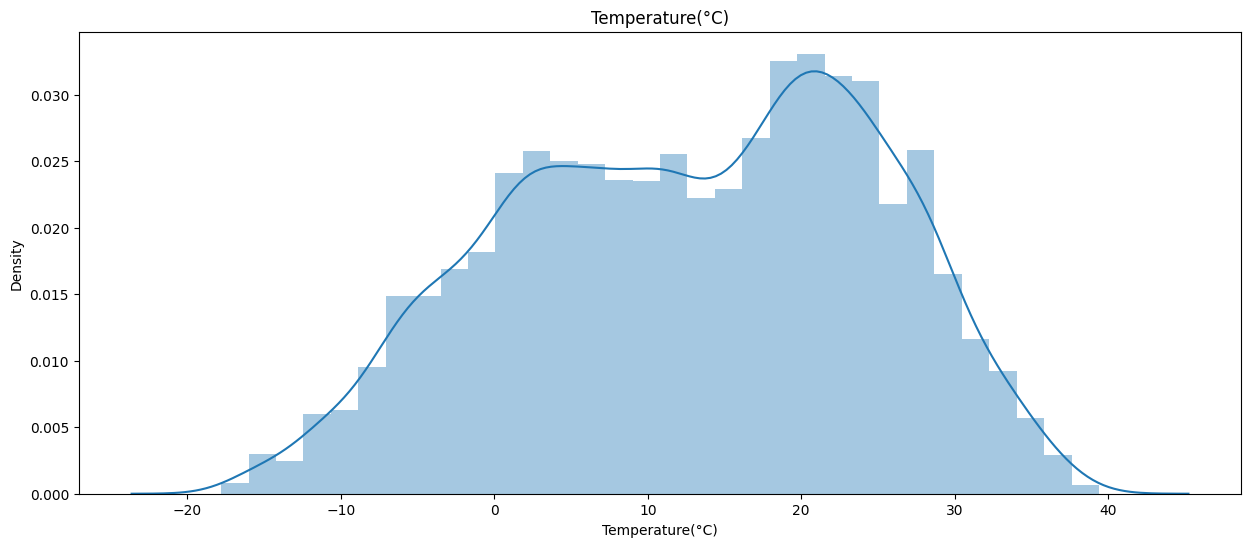

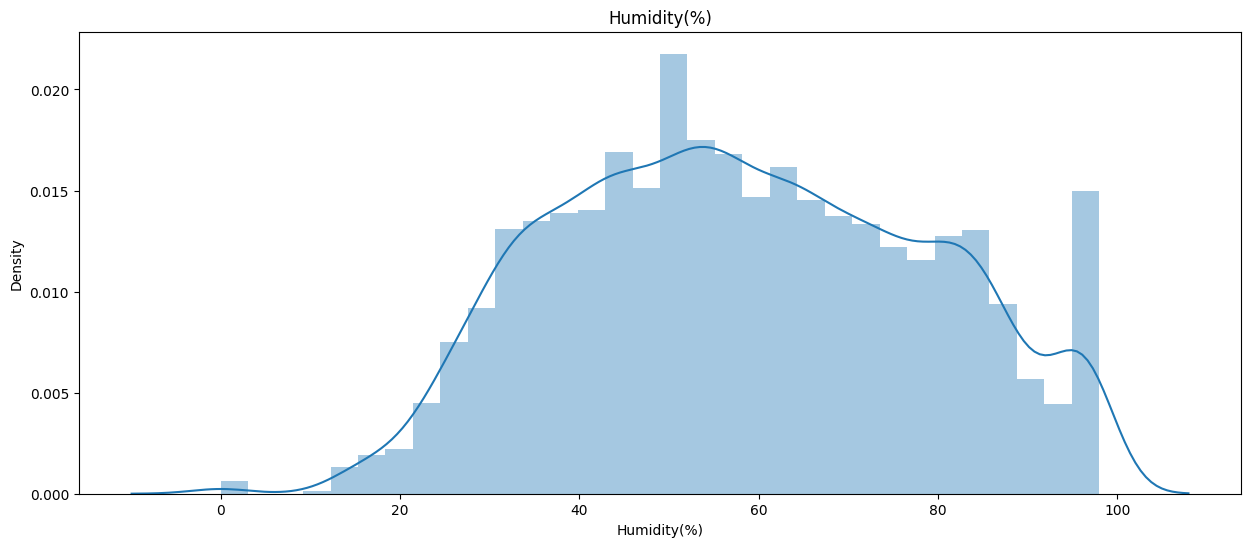

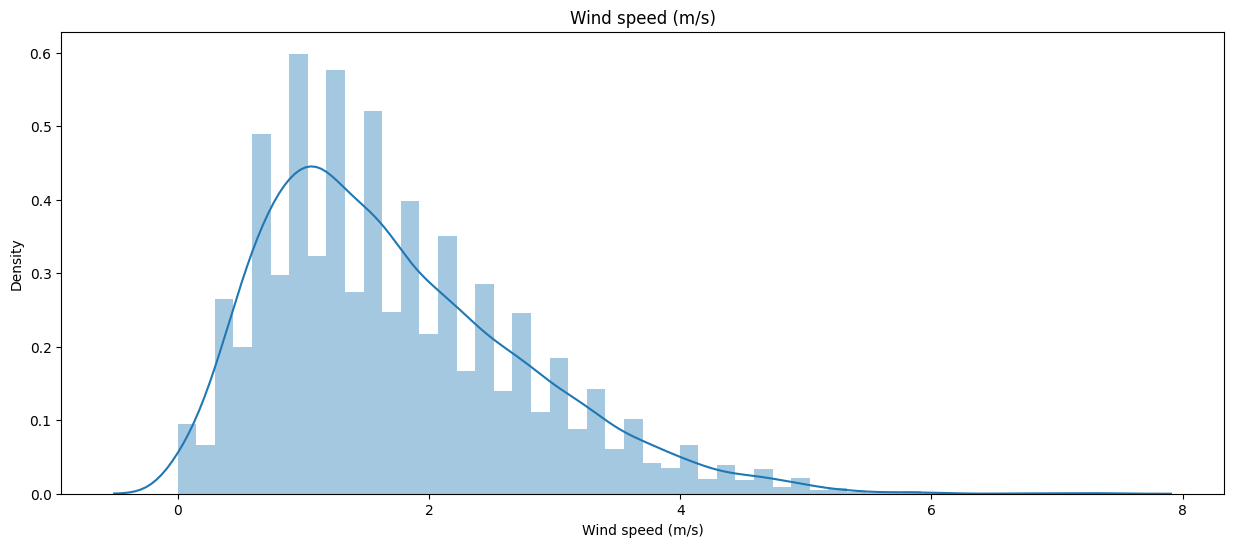

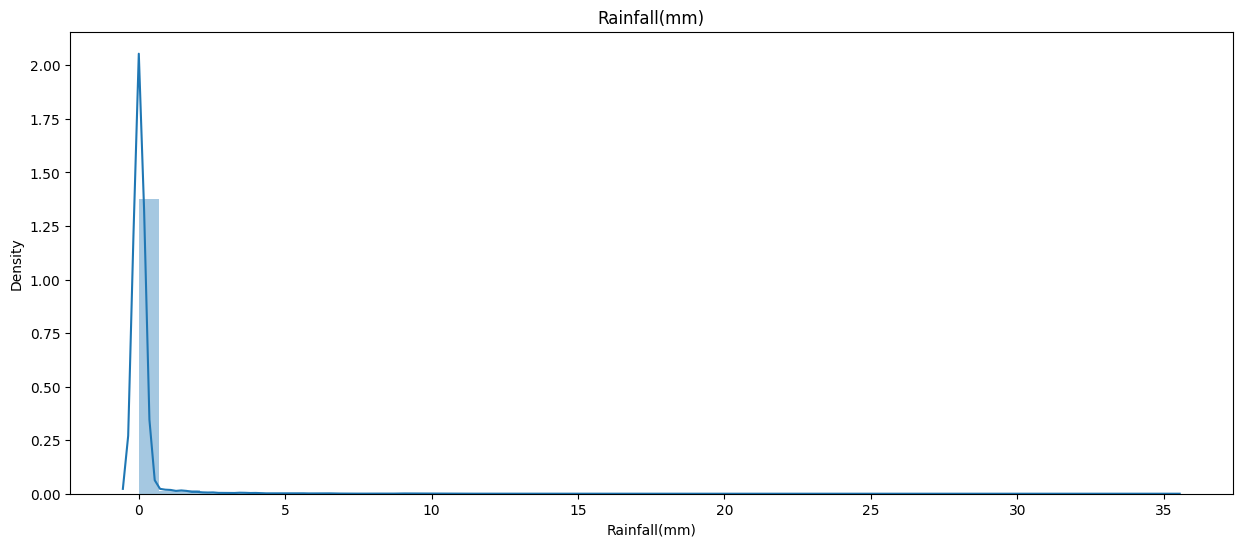

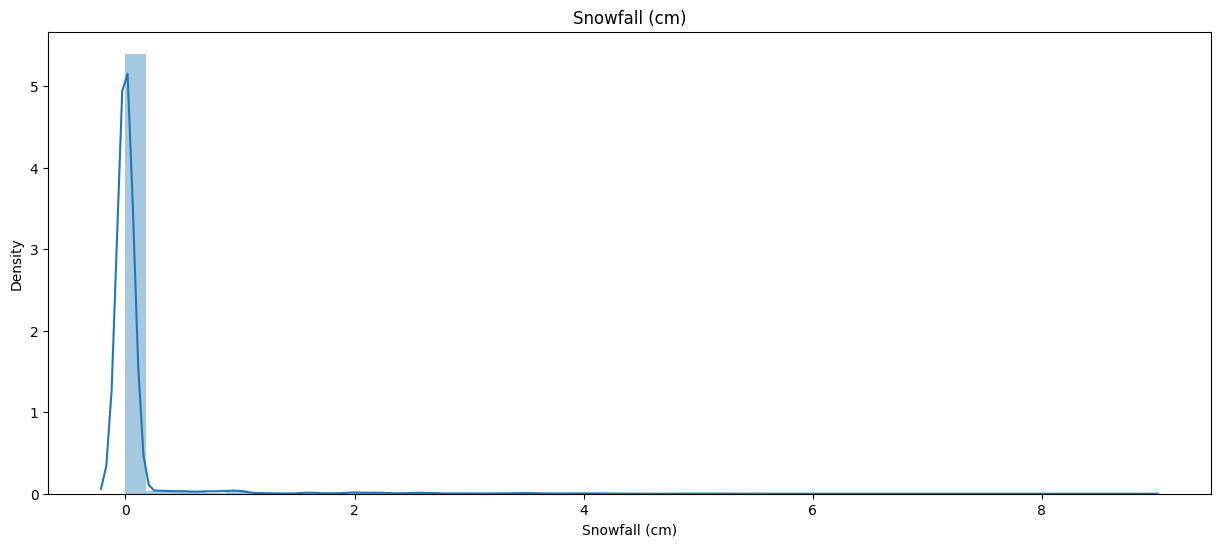

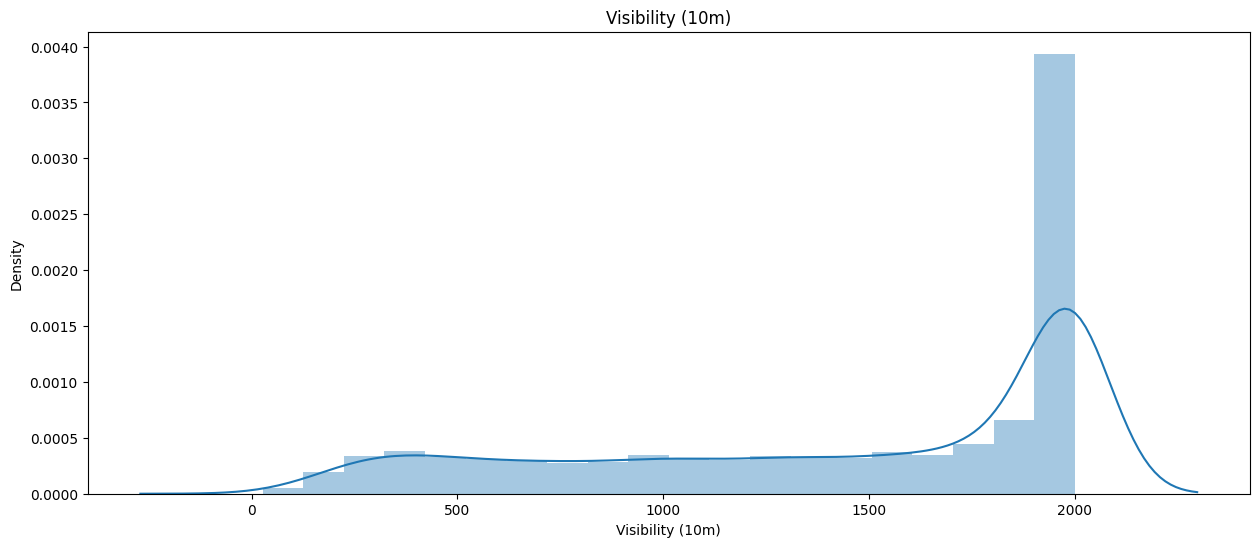

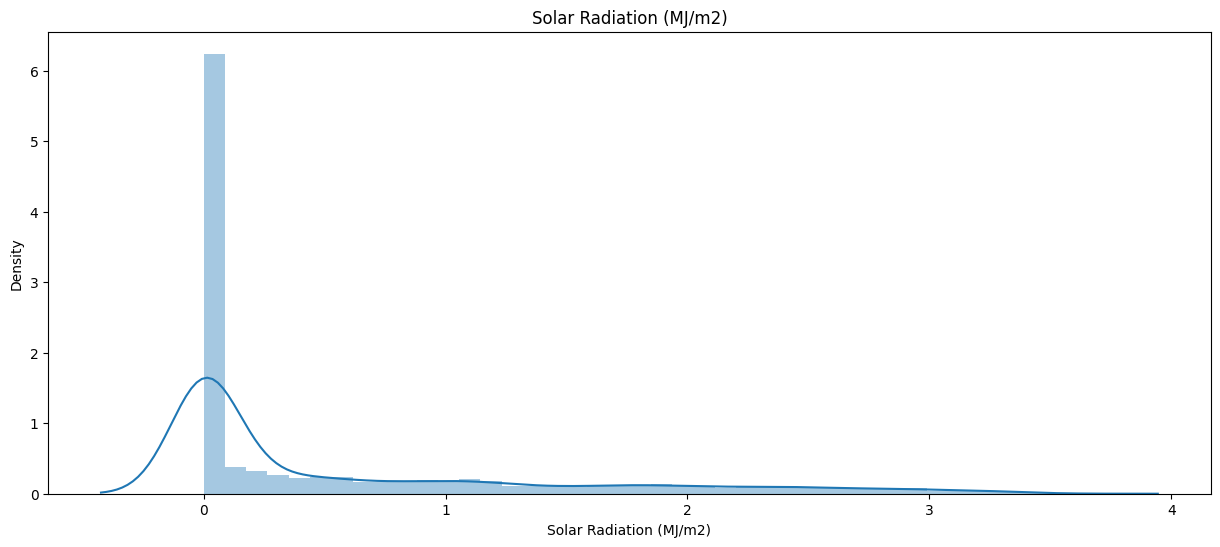

In [ ]:
# Chart - 12 visualization code
# Creating a for loop for visualizing all the numerical variables using distplot.

for i in numerical_data:
  if i not in ['Rented Bike Count']:
    plt.figure(figsize=(15,6))
    plt.title(i)
    sns.distplot(bike_df[i] )
    plt.show()

In [ ]:
# Correlation Heatmap visualization code

corr = data.corr()

plt.figure(figsize = (18,8))
sns.heatmap(corr, annot = True , cmap = 'coolwarm')
plt.show()

## **DATA** **PREPARATION**

In [ ]:
bike_df.shape

In [ ]:
bike_pr = bike_df.copy()

In [ ]:
bike_pr.shape

## **PREDICTING BY IMPLIMENTATION OF LINEAR, LASSO, RIDGE, ELASTIC REGRESSION**

In [ ]:
X = bike_pr[['Seasons', 'Holiday','Functioning Day']]

In [ ]:
X = pd.get_dummies(X, columns=['Seasons', 'Holiday','Functioning Day'])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)


In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
reg.score(X_train, y_train)

In [ ]:
from sklearn.metrics import mean_squared_error

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

RMSE = np.sqrt(mse)
print("RMSE :" ,RMSE)

In [ ]:
reg.coef_

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.1 , max_iter= 3000)

lasso.fit(X_train, y_train)

In [ ]:
lasso.score(X_train, y_train)

In [ ]:
y_pred_l = lasso.predict(X_test)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
### Cross validation
lasso = Lasso()
parameters = {'alpha': [1e-15, 1e-13, 1e-10, 1e-8, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 51, 10, 20, 30, 40, 45, 50, 55, 60, 100]}
lasso_regressor = GridSearchCV(lasso, parameters)
lasso_regressor.fit(X_train, y_train)

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

In [ ]:
y_pred_lasso = lasso_regressor.predict(X_test)

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_lasso))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
from sklearn.linear_model import Ridge

ridge  = Ridge(alpha=0.1)

In [ ]:
ridge.fit(X_train,y_train)

In [ ]:
ridge.score(X_train, y_train)

In [ ]:
y_pred_r = ridge.predict(X_test)

In [ ]:
# Hyperprarameter tuning
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

In [ ]:
#Model Prediction
y_pred_ridge = ridge_regressor.predict(X_test)

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_ridge))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#SSE = a l1 + b l2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [ ]:
elasticnet.fit(X_train,y_train)

In [ ]:
elasticnet.score(X_train, y_train)

In [ ]:
y_pred_en = elasticnet.predict(X_test)

In [ ]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, y_train)

In [ ]:
y_pred_elastic = elastic_regressor.predict(X_test)

In [ ]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_elastic))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
### Heteroscadacity
plt.scatter(10**(y_pred_lasso),10**(y_test)-10**(y_pred_lasso))

In [ ]:
10**(y_pred_lasso)

In [ ]:
10**(y_test)